<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad2b_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 2.b Procesamiento Digital de Imagenes 2024
## Manejo de Histograma


In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp

## Ejercicio 1:
Manejo de histograma
1. Cargue y visualice la imagenes patron2.tif y patron.tif (a esta ultima utilıcela
a escala de grises).

    a) Reflexione acerca de que histograma espera obtener para cada una.

    b) Obtenga los histogramas y grafıquelos.
```
histr = cv2.calcHist(images, channels, mask, histSize, ranges[,
hist[, accumulate]])
pyplot.plot(histr)
```

    c) Identifique la informacion suministrada y analıcela en relacion a su expectativa.



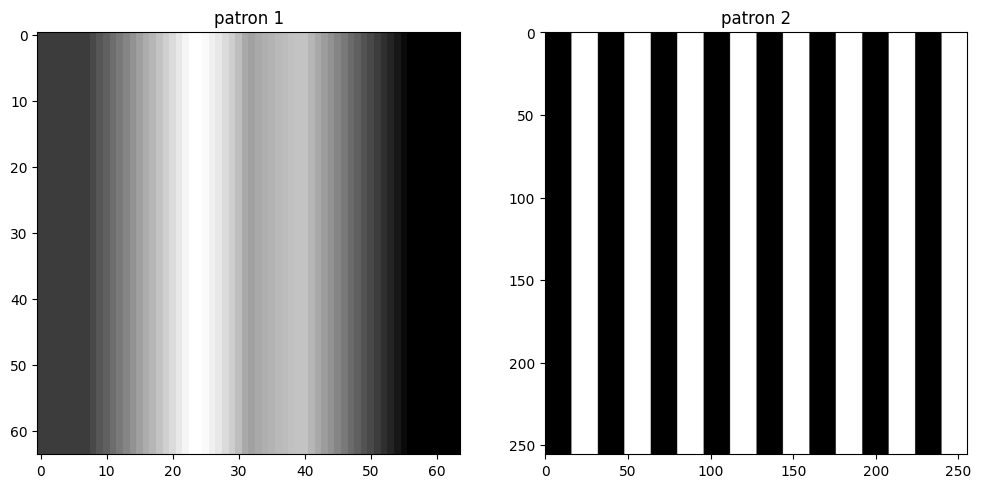

In [ ]:
# EJERCICIO 1.1
# punto a
img_patron = cv2.imread('patron.tif',cv2.IMREAD_GRAYSCALE)
img_patron2 = cv2.imread('patron2.tif',cv2.IMREAD_GRAYSCALE)

fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,12))
ax[0].imshow(img_patron,cmap='gray')
ax[0].set_title('patron 1')
ax[1].imshow(img_patron2,cmap='gray')
ax[1].set_title('patron 2')
plt.show()

<font color="magenta">
Por las imagenes en escalas de grises se prevee que el histograma del patron 1 sea mas homogéneo,
dado que se observan una region de pixeles oscuros parecida a la zona más gris, porque la cantidad de
pixeles para estas intensidades deberia ser parecido, salvo por estos extremos de la imagen

En el histograma del patron 2, por el contrario, se deberia ver picos muy pronunciados para una
intensidad oscura (lineas negras) y otra para la intensidad mas clara (linea blanca)
<font/>

Text(0.5, 1.0, 'histograma del PATRON 2')

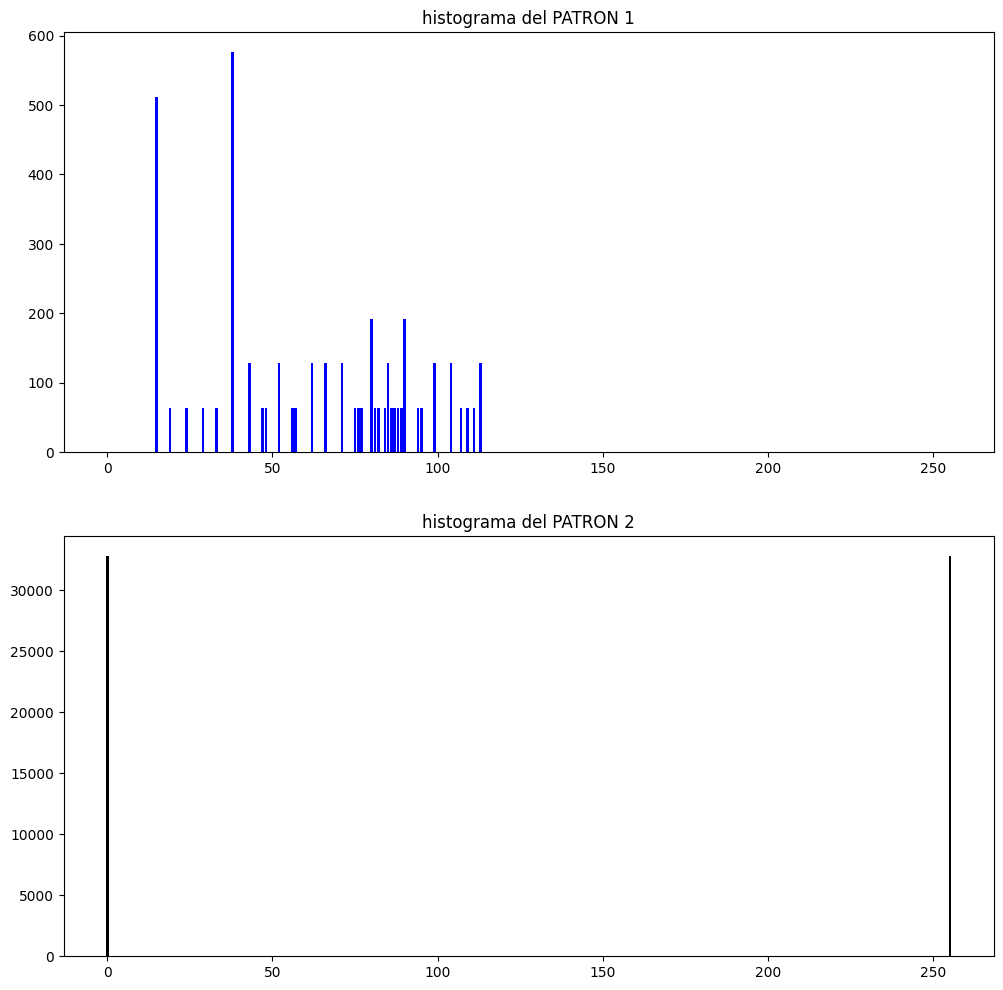

In [ ]:
# punto b
# grafico los histogramas
# histr = cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
# pyplot.plot(histr)

# hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist_1 = cv2.calcHist([img_patron],[0],None,[256],[0,256]).astype(int)
hist_2 = cv2.calcHist([img_patron2],[0],None,[256],[0,256]).astype(int)

# uso esta funcion porque el calcHist me devuelve una lista de listas, dado que pueden ser muchos canales
# el .bar() no le gusta lista de lista, entonces tengo que concatenar las listas para poder plotear una lista sola
hist_1 = [elemento for sublist in hist_1 for elemento in sublist]
hist_2 = [elemento for sublist in hist_2 for elemento in sublist]

fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(12,12))
ax[0].bar(x=np.arange(0,256),height=hist_1,color='blue')
ax[0].set_title('histograma del PATRON 1')
ax[1].bar(x=np.arange(0,256),height=hist_2,color='k')
ax[1].set_title('histograma del PATRON 2')

<font color='magenta'>bar
en cuanto al histograma del patron 1 se observa que para casi todas las intensidades oscuras es algo
homogeneo el histograma, aparecen 2 picos donde hay mayor concentracion de pixeles

se observa que en los histogramas que para el patron 2 el resultado es parecido a lo esperado
incluso ambos picos tienen una cantidad de pixeles pareja, un poco mas de 30 mil cada uno
</font>

2. Los archivos histo1.tif, histo2.tif, histo3.tif, histo4.tif e histo5.tif
contienen histogramas de imagenes con diferentes caracterısticas. Se pide:

    a) Analizando solamente los archivos de histograma y realice una descripcion de la imagen a la que corresponden (¿es clara u oscura?, ¿tiene buen contraste?, ¿el histograma me explica algo respecto de la ubicacion de los grises?, etc.).

    b) Anote la correspondencia histograma-imagen con los archivos imagenA.tif a imagenE.tif, basandose en su analisis previo.

    c) Cargue las imagenes originales y muestre los histogramas. Comparelos con sus respuestas del punto anterior.

    d) Obtenga y analice la utilidad de las siguientes propiedades estadısticas de los histogramas: media, varianza, asimetrıa, energıa y entropıa.


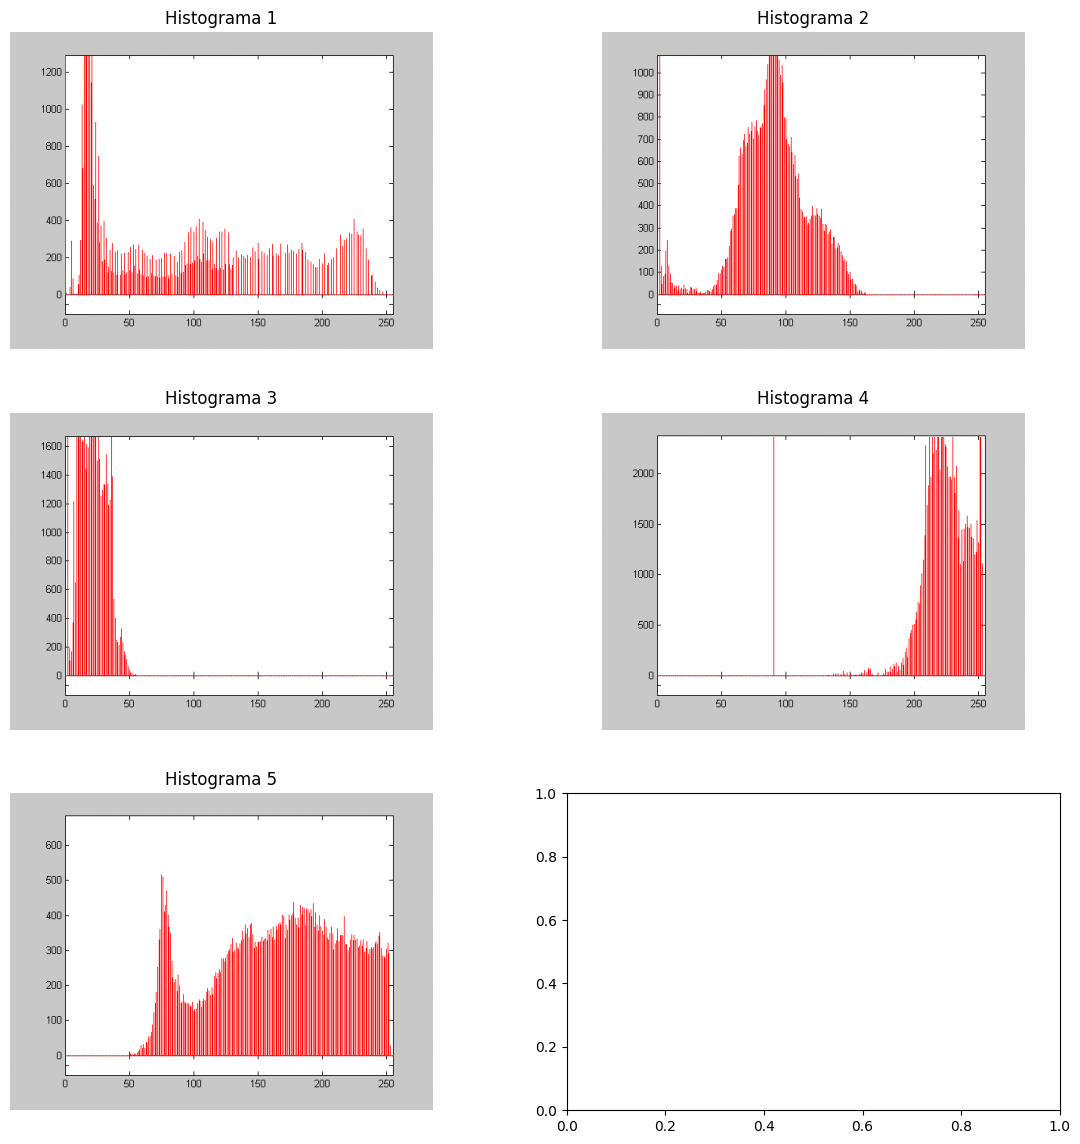

In [ ]:
# EJERCICIO 1.2
histo1 = cv2.imread('histo1.tif',cv2.IMREAD_COLOR)
histo2 = cv2.imread('histo2.tif',cv2.IMREAD_COLOR)
histo3 = cv2.imread('histo3.tif',cv2.IMREAD_COLOR)
histo4 = cv2.imread('histo4.tif',cv2.IMREAD_COLOR)
histo5 = cv2.imread('histo5.tif',cv2.IMREAD_COLOR)

fig,ax = plt.subplots(nrows=3,ncols=2,figsize=(14,14))
ax[0,0].imshow(histo1)
ax[0,0].set_title('Histograma 1')
ax[0,0].axis('off')
ax[0,1].imshow(histo2)
ax[0,1].set_title('Histograma 2')
ax[0,1].axis('off')
ax[1,0].imshow(histo3)
ax[1,0].set_title('Histograma 3')
ax[1,0].axis('off')
ax[1,1].imshow(histo4)
ax[1,1].set_title('Histograma 4')
ax[1,1].axis('off')
ax[2,0].imshow(histo5)
ax[2,0].set_title('Histograma 5')
ax[2,0].axis('off')


plt.show()

<font color="magenta">
Histograma 1: posee pixeles en la mayoria de las intensidades, pero la mayor concentracion se encuentra entre los primero 50 de intensidad, por lo que deberia ser una imagen donde prevalecen los pixeles oscuros

Histograma 2: la concentracion se da cerca de los 100, parece una distribucion gauseana, por lo que se puede decir que la imagen deberia ser bastante homogenea en intensidad y no tendria mucho contraste

Histograma 3: esta imagen posee todos los pixeles dentro del rango de intensidad [0,50], de modo que será muy oscura

Histograma 4: por el contrario a la imagen 3, en esta imagen, segun el histograma, deberia tener una intensidad clara, ya que la mayoria de los pixeles estan en las intensidades mayores a 150, salvo por algunos que se encuentra cerca de 100, que podrian ser aquellos de los bordes

Histograma 5: segun este histograma la imagen parece algo homogenea pero en escala de grises medios tirando a claros, ya que no tiene pixeles cuya insidad sea de 50 o menos


<font/>

<font color="magenta">
Segun estas deducciones los histogramas y las imagenes se corresponden:

Histograma 1 -> Imagen C

Histograma 2 -> Imagen D

Histograma 3 -> Imagen E

Histograma 4 -> Imagen B

Histograma 5 -> Imagen A
<font/>

Histograma  1
Media : 234.375
Varianza : 131734.1484375
Asimetria : 2.296400637485128
Energia : 120000
Entropia : 6.592177233557798
-----------------------
Histograma  2
Media : 417.1875
Varianza : 726804.78515625
Asimetria : 2.2923460615364992
Energia : 213600
Entropia : 5.861619083261708
-----------------------
Histograma  3
Media : 234.375
Varianza : 211493.3984375
Asimetria : 5.47232331337086
Energia : 120000
Entropia : 6.739286398507357
-----------------------
Histograma  4
Media : 225.8359375
Varianza : 23729.613708496094
Asimetria : -0.40298121293204586
Energia : 115628
Entropia : 7.510771795048202
-----------------------
Histograma  5
Media : 234.375
Varianza : 392815.78125
Asimetria : 3.3058726261766265
Energia : 120000
Entropia : 5.203148086412085
-----------------------


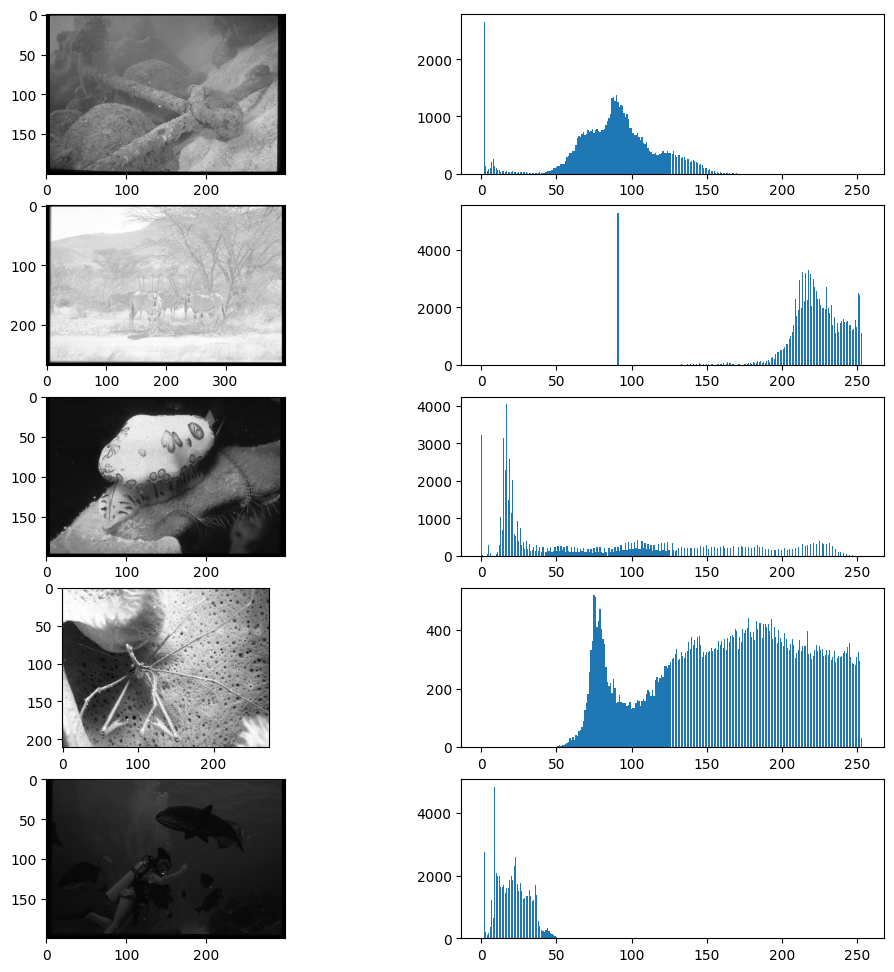

In [ ]:
# cargo las imagenes y los histogramas
fig,ax = plt.subplots(ncols=2,nrows=5,figsize=(12,12))

# imagenes
imgA = cv2.imread('images/imagenA.tif',cv2.IMREAD_GRAYSCALE)
imgB = cv2.imread('images/imagenB.tif',cv2.IMREAD_GRAYSCALE)
imgC = cv2.imread('images/imagenC.tif',cv2.IMREAD_GRAYSCALE)
imgD = cv2.imread('images/imagenD.tif',cv2.IMREAD_GRAYSCALE)
imgE = cv2.imread('images/imagenE.tif',cv2.IMREAD_GRAYSCALE)

images = [imgA,imgB,imgC,imgD,imgE]

for i in range(0,5):
    # hist_2 = cv2.calcHist([img_patron2],[0],None,[256],[0,256]).astype(int)
    # hist_1 = [elemento for sublist in hist_1 for elemento in sublist]
    # ax[0].bar(x=np.arange(0,256),height=hist_1,color='blue')

    hist = cv2.calcHist([images[i]],[0],None,[256],[0,256]).astype(int)
    hist = [elemento for sublist in hist for elemento in sublist]
    ax[i,0].imshow(images[i],cmap='gray')
    ax[i,1].bar(x=np.arange(0,256),height=hist)
    # Obtenga y analice la utilidad de las siguientes propiedades estadısticas de los histogramas: media, varianza, asimetrıa, energıa y entropıa.
    print('Histograma ',str(i+1))
    print('Media :',np.mean(hist))
    print('Varianza :',np.var(hist))
    print('Asimetria :',scp.stats.skew(hist))
    print('Energia :',np.sum(np.dot(hist,2)))

    probabilidades = hist / np.sum(hist)
    probabilidades = probabilidades[probabilidades != 0]
    print('Entropia :',-np.sum(probabilidades * np.log2(probabilidades)))
    print('-----------------------')


3. Cargue una imagen y realice la ecualizacion de su histograma.

    img equ = cv2.equalizeHist(img)

    a) Muestre en una misma ventana la imagen original, la version ecualizada y sus respectivos histogramas.

    b) Estudie la informacion suministrada por los histogramas. ¿Que diferencias nota respecto a las definiciones teoricas?

    c) Repita el analisis para distintas imagenes.


Text(0.5, 1.0, 'histograma de imagen equalizada')

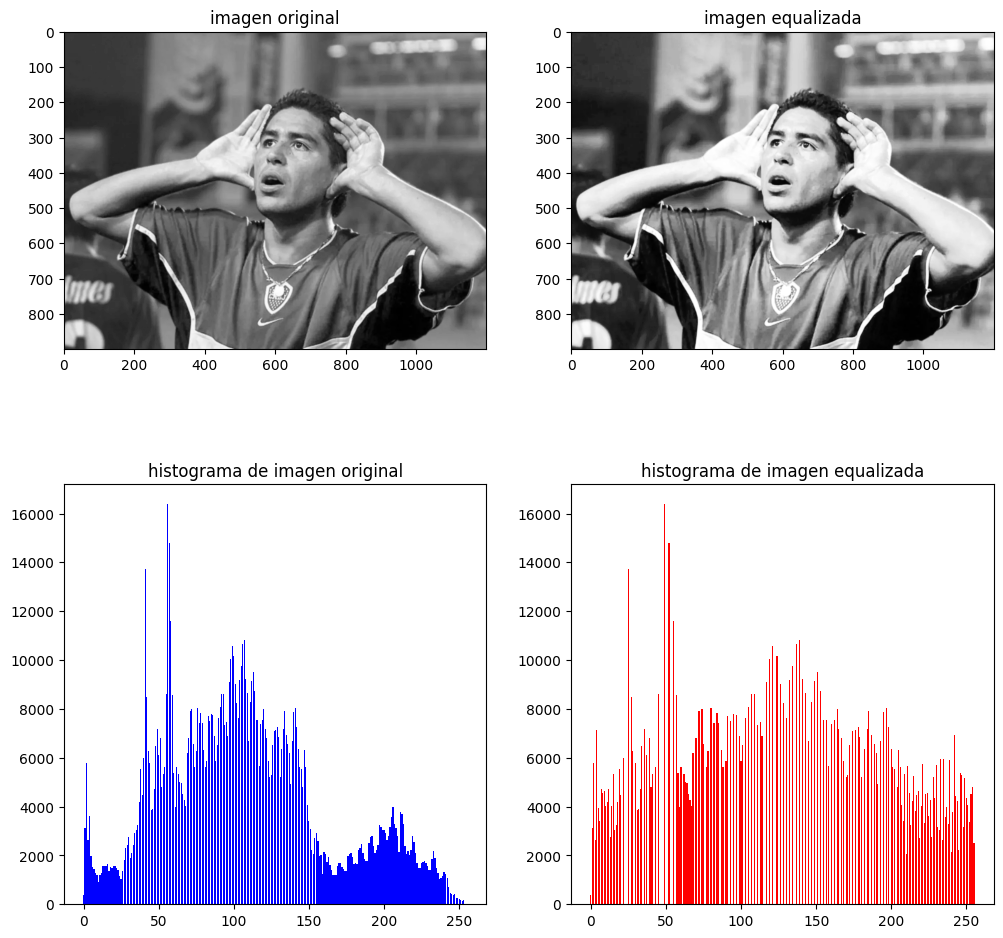

In [ ]:
# EJERCICIO 1.3
img_normal = cv2.imread('images/roman.webp',cv2.IMREAD_GRAYSCALE)
img_equ = cv2.equalizeHist(img_normal)

hist = cv2.calcHist([img_normal],[0],None,[256],[0,256]).astype(int)
hist = [elemento for sublist in hist for elemento in sublist]

hist_eq = cv2.calcHist([img_equ],[0],None,[256],[0,256]).astype(int)
hist_eq = [elemento for sublist in hist_eq for elemento in sublist]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax[0,0].imshow(img_normal,cmap='gray')
ax[0,0].set_title('imagen original')
ax[0,1].imshow(img_equ,cmap='gray')
ax[0,1].set_title('imagen equalizada')
ax[1,0].bar(x=np.arange(0,256),height=hist,color='blue')
ax[1,0].set_title('histograma de imagen original')
ax[1,1].bar(x=np.arange(0,256),height=hist_eq,color='red')
ax[1,1].set_title('histograma de imagen equalizada')

<font color="magenta">
Con respecto a la teoria, cabe recalcar que la distribucion de grises no se realiza exactamente igual para todas las intensidades de grises.

Aquellas intensidades que tenian mayores cantidades de pixeles siguen siendolas que mas pixeles tienen, y las intensidades que originalmente tenian menos pixeles ahora aumentan, pero esta "igualdad" entre niveles de grises no termina siendo igual en el sentido estricto.
<font/>

Text(0.5, 1.0, 'histograma de imagen equalizada')

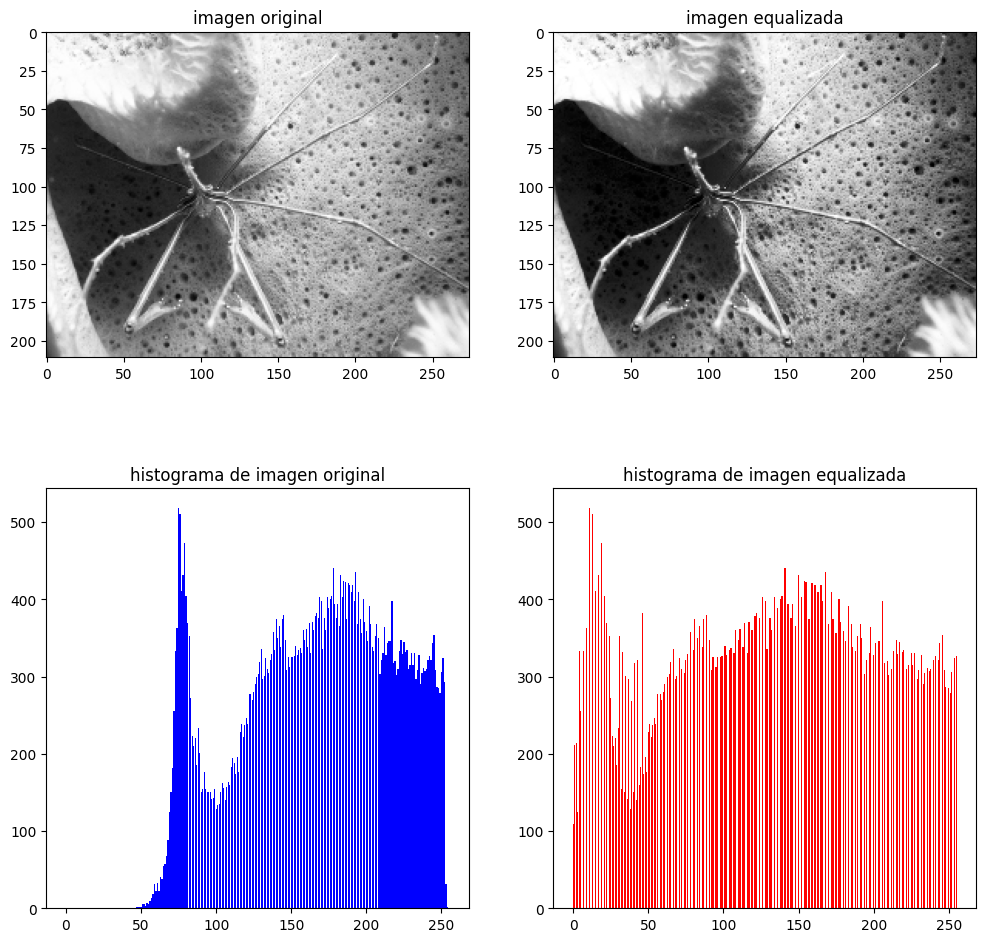

In [ ]:
img_normal = cv2.imread('images/imagenD.tif',cv2.IMREAD_GRAYSCALE)
img_equ = cv2.equalizeHist(img_normal)

hist = cv2.calcHist([img_normal],[0],None,[256],[0,256]).astype(int)
hist = [elemento for sublist in hist for elemento in sublist]

hist_eq = cv2.calcHist([img_equ],[0],None,[256],[0,256]).astype(int)
hist_eq = [elemento for sublist in hist_eq for elemento in sublist]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
ax[0,0].imshow(img_normal,cmap='gray')
ax[0,0].set_title('imagen original')
ax[0,1].imshow(img_equ,cmap='gray')
ax[0,1].set_title('imagen equalizada')
ax[1,0].bar(x=np.arange(0,256),height=hist,color='blue')
ax[1,0].set_title('histograma de imagen original')
ax[1,1].bar(x=np.arange(0,256),height=hist_eq,color='red')
ax[1,1].set_title('histograma de imagen equalizada')

4. (Opcional): Investigue la ecualizacion adaptativa de histogramas CLAHE (Contrast Limited Adaptive Histogram Equalization)

```
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
```

In [ ]:
# EJERCICIO 1.4

## Ejercicio 2: Trabajos de aplicacion
1. En la imagen cuadros.tif se observa un conjunto de cuadros negros sobre un fondo casi uniforme. Utilice ecualizacion local del histograma para revelar los detalles ocultos en la imagen y compare los resultados con los obtenidos con ecualizacion global.

    Ayuda: el tamaño de ventana y su localizaci´on es clave para realizar la ecualizacion local.


2. Realice un algoritmo de busqueda por correlacion de histogramas de intensidad. Se debe informar el contenido de la imagen: Bandera, Caricatura, Personaje o Paisaje. Utilice las imagenes disponibles en Busqueda histograma.zip.


In [ ]:
# EJERCICIO 2.1

In [ ]:
# EJERCICIO 2.2